In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import binom
import matplotlib
import seaborn as sns

Use the numerical variables from our dataset this week.

In [2]:
numerical1=pd.read_csv('numerical1.csv') 

In [10]:
numerical1

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,2763.519279,56274,69,32,5,0,1,384.811147
1,1,6979.535903,0,94,13,42,0,8,1131.464935
2,2,12887.431650,48767,108,18,38,0,2,566.472247
3,3,7645.861827,0,106,18,65,0,7,529.881344
4,4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,9131,8163.890428,0,85,9,37,3,2,790.784983
9132,9132,7524.442436,21941,96,34,3,0,3,691.200000


Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

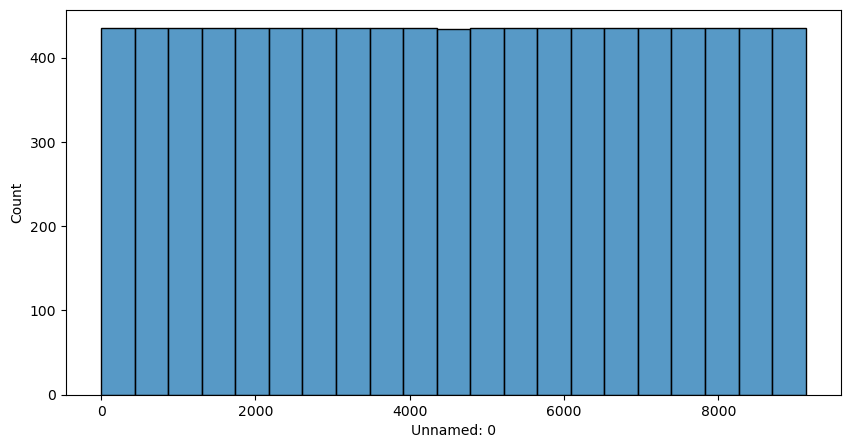

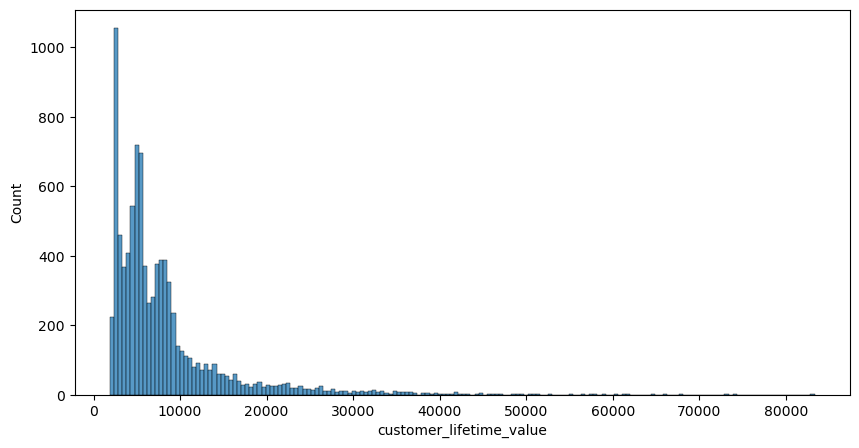

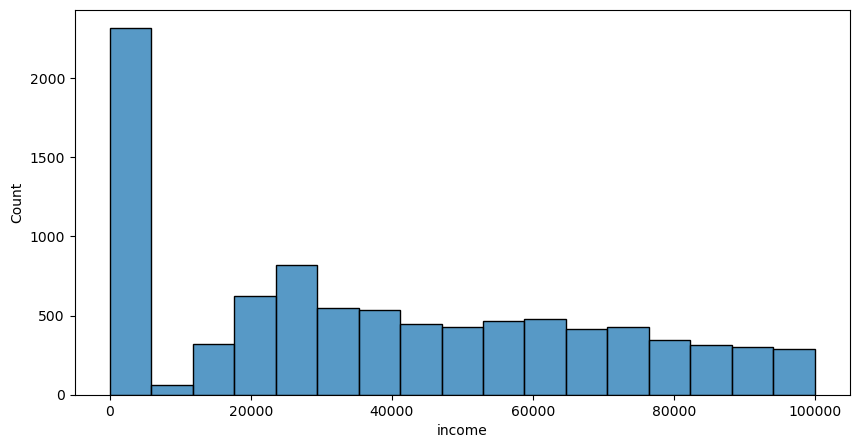

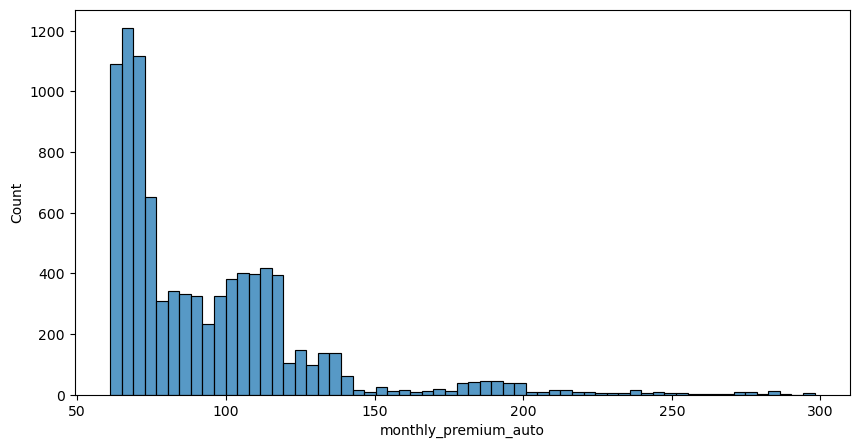

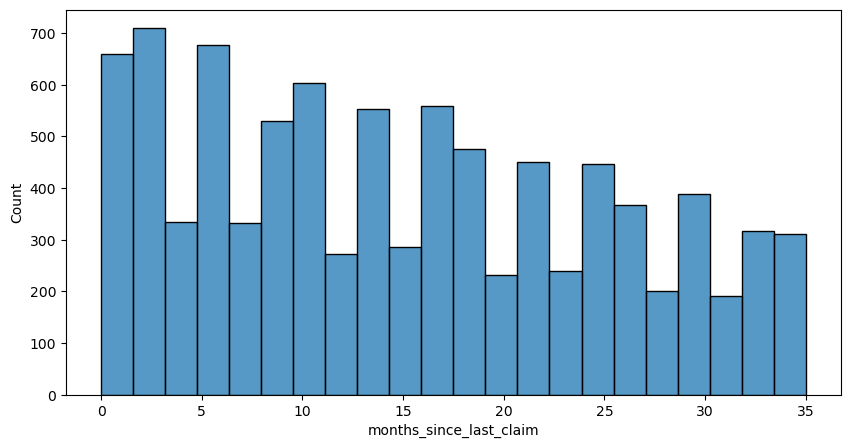

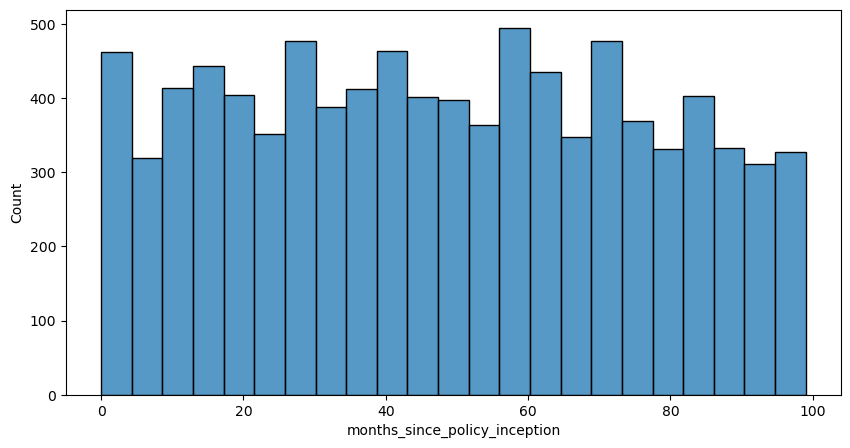

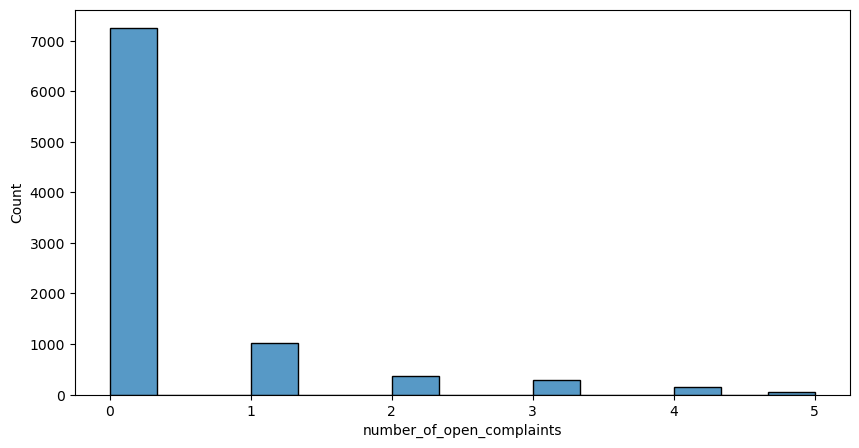

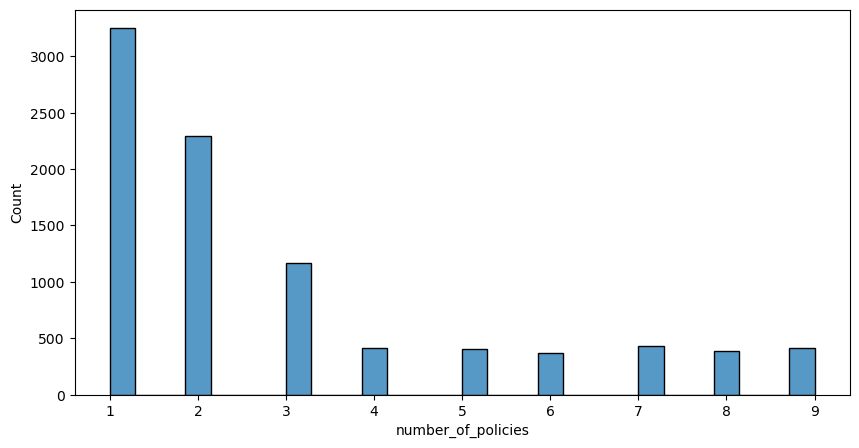

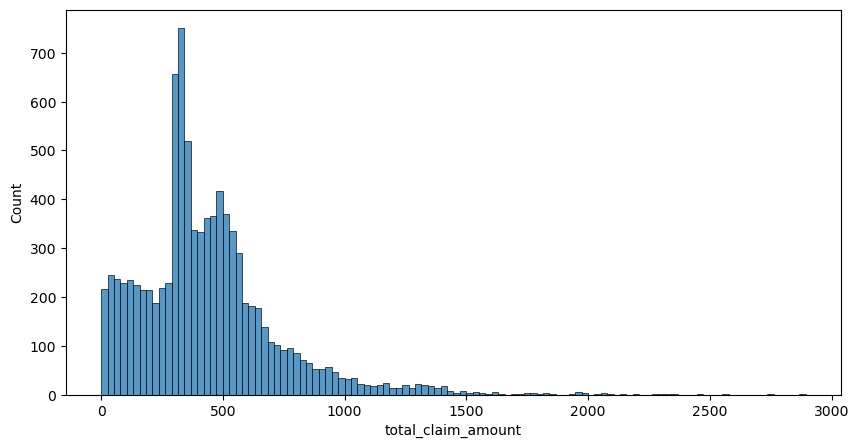

In [9]:
for col in numerical1.columns:
    plt.figure(figsize=(10,5))
    plot=sns.histplot(x=col, data=numerical1,)
    plt.show()

In [ ]:
#customer lifetime value, monthly premium auto, and total claim amount look exponential. The rest looks more or less normal, albeit that for example number of open complaints looks a bit exponential.

Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

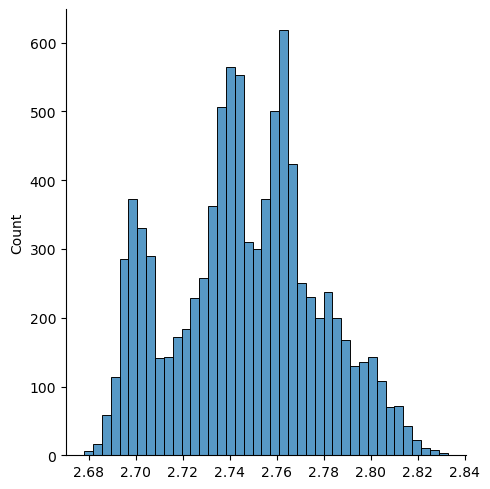

In [12]:
from scipy import stats
xt, lmbda = stats.boxcox(numerical1['customer_lifetime_value'])
sns.displot(xt)
plt.show()

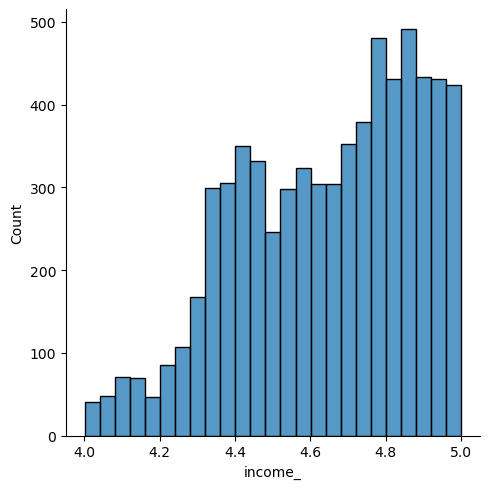

In [22]:
len(numerical1[numerical1['income']<=0])  # number of such observations.
# if you do not want to lose this data, replace it with the mean of the column
numerical1['income_'] = np.where(numerical1['income']<=0,0,numerical1['income'])

# now calculate mean of the new column , excluding zeros in the count
mean = np.sum(numerical1['income_'])/len(numerical1[numerical1['income_']>0])

numerical1['income_'] = numerical1['income_'].replace(0,mean)
# numerical1 = numerical1.drop(['income'], axis=1)
# sns.displot(numerical1['income_'])
# plt.show()

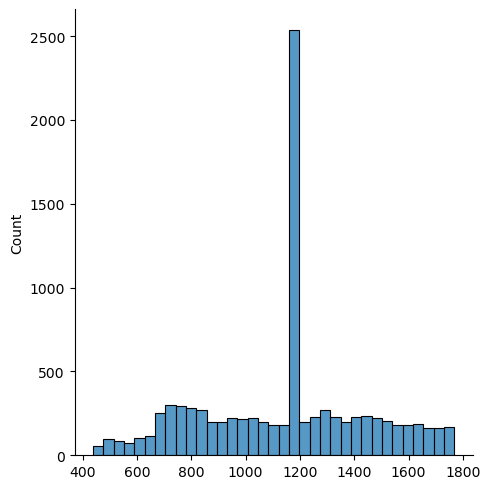

In [16]:
from scipy import stats
xt, lmbda = stats.boxcox(numerical1['income_'])
sns.displot(xt)
plt.show()

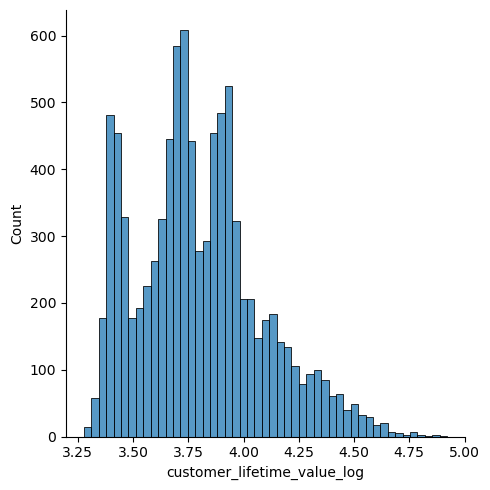

In [21]:
def log_transform_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later
numerical1['customer_lifetime_value_log'] = list(map(log_transform_clean2, numerical1['customer_lifetime_value']))
# Now we replace the NAN by the mean
numerical1['customer_lifetime_value_log'] = numerical1['customer_lifetime_value_log'].fillna(np.mean(numerical1['customer_lifetime_value_log']))
sns.displot(numerical1['customer_lifetime_value_log'])
plt.show()

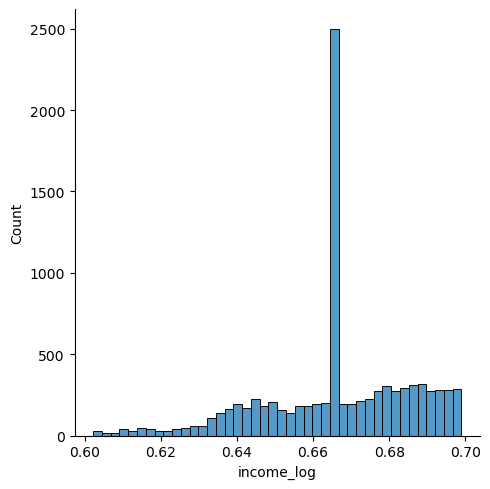

In [18]:
def log_transform_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later
numerical1['income_log'] = list(map(log_transform_clean2, numerical1['income']))
# Now we replace the NAN by the mean
numerical1['income_log'] = numerical1['income_log'].fillna(np.mean(numerical1['income_log']))
sns.displot(numerical1['income_log'])
plt.show()